In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import pybrain
import pandas

pylab.rcParams['figure.figsize']= 16,5

In [199]:
from pybrain import FeedForwardNetwork
from pybrain import LinearLayer,SigmoidLayer
from pybrain import FullConnection
from pybrain.supervised.trainers import BackpropTrainer

importing FeedForward Network class from pybrain

In [2]:
from pybrain import FeedForwardNetwork
n = FeedForwardNetwork()

importing LinearLayer and SigmoidLayer as layer class of neurons for each layer

In [3]:
from pybrain import LinearLayer,SigmoidLayer
inLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(2)
outLayer = LinearLayer(1)

Adding layers to FFN

In [4]:
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)

Import FullConnecition Class to create matrix for connections between layers

In [5]:
from pybrain import FullConnection
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)

Add connections to FNN

In [6]:
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)

Sort Modules in FNN for initialice the FNN as topologically sorted of the modules (layers)

In [7]:
n.sortModules()

Printing the FNN estructures 

In [8]:
print n

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <SigmoidLayer 'SigmoidLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'SigmoidLayer-7' -> 'LinearLayer-8'>, <FullConnection 'FullConnection-5': 'LinearLayer-3' -> 'SigmoidLayer-7'>]



activating the FFN

In [9]:
n.activate([1,2])

array([-1.38922383])

Checking connections weigths

In [10]:
in_to_hidden.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738])

In [11]:
hidden_to_out.params

array([-0.56228732, -1.00570414])

In [12]:
n.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738, -0.56228732,
       -1.00570414])

Creating DataSet

In [3]:
from pybrain.datasets import SupervisedDataSet

In [4]:
DS = SupervisedDataSet(3,2)
DS.appendLinked([1,2,3], [4,5] )
len(DS)

1

In [7]:
DS['input']

array([[ 1.,  2.,  3.]])

In [140]:
def create_DS(values, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    return dataSet

In [64]:
val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
lag = 12
dat = create_DS(val,lag)
dat

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.],
       [  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
         15.],
       [  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.],
       [  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
         17.],
       [  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.],
       [  8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
         19.],
       [  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
         20.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.],
       [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.],
       [ 12.,  13.,  

In [67]:
rawData = pd.read_csv('resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=16, skip_blank_lines=True)
column = rawData.columns.values

In [68]:
rawData
Data = rawData.drop(rawData.index[:2])
Data = Data.reset_index(drop = True)
Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']

Se eliminan los 2 primeros indices debido a que no son utiles ( es texto y la primera observación no tiene valor) y se crea la estructura de Serie (para la serie de tiempo)

In [70]:
TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))

In [71]:
TS.index= Data['Fecha']

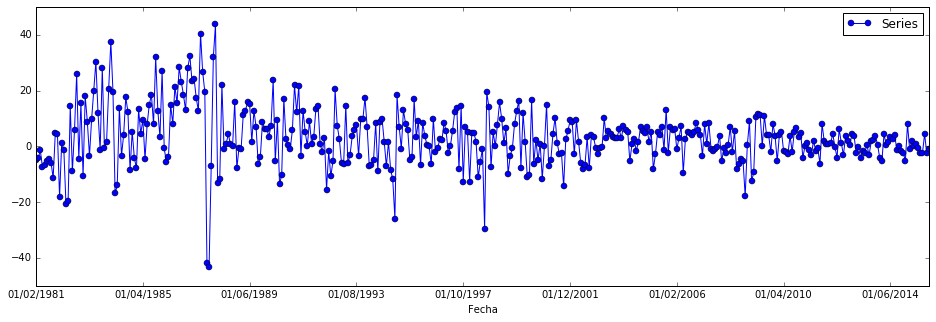

In [75]:
plt.figure()
TS.plot(style='o-', label = 'Series')
plt.legend()

In [141]:
dataMatrix = create_DS(Data['Tasa de crecimiento Mensual'],12)

In [124]:
from pybrain import  datasets

In [146]:
DS = datasets.SupervisedDataSet(12, 1)

In [147]:
for x in xrange(len(dataMatrix)):
    DS.appendLinked(dataMatrix[x], TS[12+x])

In [153]:
len(DS)

407

In [169]:
TrainValDS, TestDS = DS.splitWithProportion(0.913)

In [170]:
len(TrainValDS)

371

In [171]:
len(TestDS)

36

In [173]:
TrainDS, ValDS = TrainValDS.splitWithProportion(0.8)

In [175]:
len(TrainDS)

296

In [177]:
len(ValDS)

75

In [192]:
ffn = FeedForwardNetwork()
inLayer = LinearLayer(12)
hiddenLayer = SigmoidLayer(3)
outLayer = LinearLayer(1)

In [193]:
ffn.addInputModule(inLayer)
ffn.addModule(hiddenLayer)
ffn.addOutputModule(outLayer)

In [194]:
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)
ffn.addConnection(in_to_hidden)
ffn.addConnection(hidden_to_out)

In [195]:
ffn.sortModules()

In [205]:
trainer = BackpropTrainer(ffn, TrainDS)

In [206]:
trainer.trainUntilConvergence(verbose= True, maxEpochs=1000, validationProportion= 0.1,continueEpochs= 10)

In [208]:
predictions = ffn.activateOnDataset(TestDS)